In [174]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from sklearn.preprocessing import MinMaxScaler
import talib

In [175]:
input_data = 'data01/SBI_4_5_2021_4_5_2020.csv'
original_data = pd.read_csv(input_data)
print(original_data.shape)
original_data.head()

(94031, 5)


,open,high,low,close,volume
0,182.45,182.6,181.10,182.5,996085
1,182.60,183.3,182.55,183.3,515045
2,183.35,183.5,182.60,182.7,496120
3,182.75,182.9,182.35,182.5,384723
4,182.50,182.7,181.30,181.3,694631


In [176]:
stockData = pd.Series([],dtype='float64') 
start_range = 80
end_range = 81
close_list = original_data.iloc[(720*start_range):(720*end_range), 3].values.tolist()
low_list = original_data.iloc[(720*start_range):(720*end_range), 2].values.tolist()
high_list = original_data.iloc[(720*start_range):(720*end_range), 1].values.tolist()
close = np.asarray(close_list, dtype='float64')
low = np.asarray(low_list, dtype='float64')
high = np.asarray(high_list, dtype='float64')

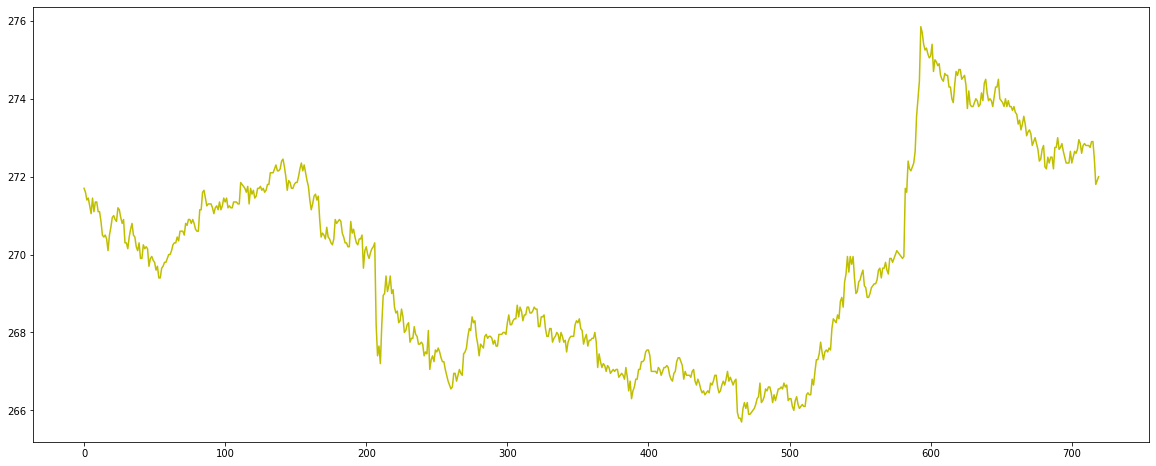

In [177]:
plt.figure(figsize=(20, 8))
plt.plot(close, c='y')
mom = talib.MOM(close, timeperiod=8)
rsi = talib.RSI(close, timeperiod=8)


In [178]:
real = talib.ATR(high, low, close, timeperiod=30)
real[30]

0.3599999999999947

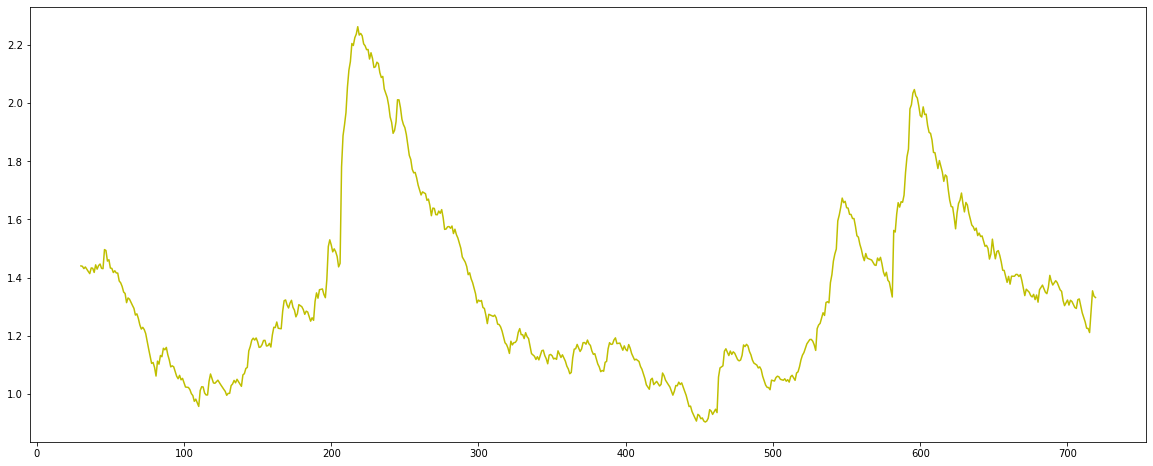

In [179]:
real = real*4
plt.figure(figsize=(20, 8))
plt.plot(real, c='y')